# Project: Investigate the TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href='question'>Question</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

Movies are a great source of entertainment for many people. Movie lovers like to know more than just the screen time shown them on the public movies. So as a Data Scientist that loves movies, I have decided to ask very subtle questions on movies and get the answers using the TMDB dataset obtained from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv). 

<a id='question'></a>
## Question
With the datasets we will be exploring some deep questions and giving answers based on the data available on this notebook as follows:
- Does the budget and revenue of movie affect vote_average (viewers_rating)
- Does the runtime of the movieaffect the vote_average (viewers_rating)
- What are the average revenue of the 5000 movies
 
Other metrics we will measure are
- Top ten revenue generating movie
- Least ten revenue expensive movie
- Most Rated Movie

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, data is checked for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

#### General Properties

> **Import**: In the cell below the dataset will be imported using the pandas.read_csv module

In [65]:
## Import the dataset
df1 = pd.read_csv('./data/tmdb_5000_credits.csv')
df2 = pd.read_csv('./data/tmdb_5000_movies.csv')                

> **Display**: In the cell below each of the individual dataset is view with its first five line and last five lines

In [66]:
## First five lines of the df1 data
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [67]:
## Last five lines of the df1 data
df1.tail()

,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [68]:
## First five lines of the df2 data
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [69]:
## Last five lines of the df1 data
df2.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


> **Checking for Data rows and columns**
We will use the next set of cells to confirm the shape of the data, its types, confirm it types.
 -  If the twwo subset data of are of same rows then, we can assume they are more closley related and can be joined at any point in time during our work for futher analysis.
 - If its otherwise, then alternative means are folllowed.

In [70]:
## shape of df1
df1.shape

(4803, 4)

In [71]:
## shape of df2
df2.shape

(4803, 20)

In [72]:
## checking for datatypes of df1
df1.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [73]:
## checking datatypes of df2
df2.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [74]:
## Checking columns names of df1
for i, col in enumerate(df1.columns):
    print (i, ": " , col)    

0 :  movie_id
1 :  title
2 :  cast
3 :  crew


In [75]:
## Checking columns names of df2
for i, col in enumerate(df2.columns):
    print (i, ": " , col)

0 :  budget
1 :  genres
2 :  homepage
3 :  id
4 :  keywords
5 :  original_language
6 :  original_title
7 :  overview
8 :  popularity
9 :  production_companies
10 :  production_countries
11 :  release_date
12 :  revenue
13 :  runtime
14 :  spoken_languages
15 :  status
16 :  tagline
17 :  title
18 :  vote_average
19 :  vote_count


### Data Cleaning

> **Tip**: Now we will first merge the two dataframe (df1 and df2) into 1 data frame called (df).
The eason for doing this is because since both the two dataframe has same number of rows it is assume they are point to each other.

After completing the merging, we will do the following before moving on to EDA:
- check for unique values of merge table
- check the missing data of the merge table
- check for isnull data on the merge table
- remove columns(features) not needed in answering our questions in the merge table
- replace rows/columns having missing with either ffil() or mean()

##### Merging the Two Tables

In [76]:
df = df1.merge(df2, how='inner')
df.head(5)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


***Table 1 - is above is combination of the two dataframe df1 and df2***

##### Function to check uniques values, isnul values and dtypes of the merged table

In [77]:
def report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)
    
    
summary = report(df)
print(summary)

,Total NaN,Percent of NaN,Nunique,Dtype
homepage,3096,64.379289,1691,object
tagline,844,17.550426,3944,object
overview,3,0.062383,4800,object
runtime,2,0.041589,156,float64
release_date,1,0.020794,3280,object
popularity,0,0.000000,4802,float64
vote_average,0,0.000000,71,float64
status,0,0.000000,3,object
spoken_languages,0,0.000000,544,object
revenue,0,0.000000,3297,int64


None


***Table 2 - shows the missing data, unique values, data type of each columns in df***

##### Count the Number of Duplicate Rows

In [78]:
duplicate_df = df[df.duplicated()]
print("The duplicate row in the dataset is : ", duplicate_df.shape)

The duplicate row in the dataset is :  (0, 23)


##### remove Duplicated Rows Data for Analysis

In [79]:
df.drop_duplicates(subset='movie_id', inplace=True, ignore_index=False)
df.shape

(4803, 23)

##### Check for Columns with Zeros Values

In [80]:
df_zero = df.loc[:, df.eq(0).any()]
print(df_zero.eq(0).tail())

      budget  popularity  revenue  runtime  vote_average  vote_count
4804   False       False    False    False         False       False
4805   False       False     True    False         False       False
4806    True       False     True    False         False       False
4807    True       False     True    False         False       False
4808    True       False     True    False         False       False


##### Removing Unwanted Columns for Analysis

In [81]:
df.drop(['cast', 'crew', 'homepage', 'original_title', 'id', 'status',
         'keywords', 'overview', 'tagline', 'production_countries'], 
        axis=1, inplace=True)
df.shape

(4803, 13)

##### Renaming Columns

In [82]:
df=df.rename(columns = {'vote_average' : 'viewers_ratings'})
df.columns

Index(['movie_id', 'title', 'budget', 'genres', 'original_language',
       'popularity', 'production_companies', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'viewers_ratings', 'vote_count'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

### Q0 - Does revenue and budget of movie affect vote_average (viewers_rating)

##### select correlation between the three columns first and find their correlation

In [83]:
# columns = budget, viewers_ratings, revenue
df_0 = df[['budget', 'revenue', 'viewers_ratings']].corr()
df_0

,budget,revenue,viewers_ratings
budget,1.000000,0.730554,0.093137
revenue,0.730554,1.000000,0.197328
viewers_ratings,0.093137,0.197328,1.000000


***Table - 3: The table shows the correlation between  the three select columns (busget, revenue and viewers_ratings) created from df***

##### The budget and reveue shows a zero value we will fix it:

In [84]:
# some values are zeros in the columns so we have to delete them
question_0=  df[df[['budget', 'revenue', 'viewers_ratings']] > 0]

##### visualise the correlation

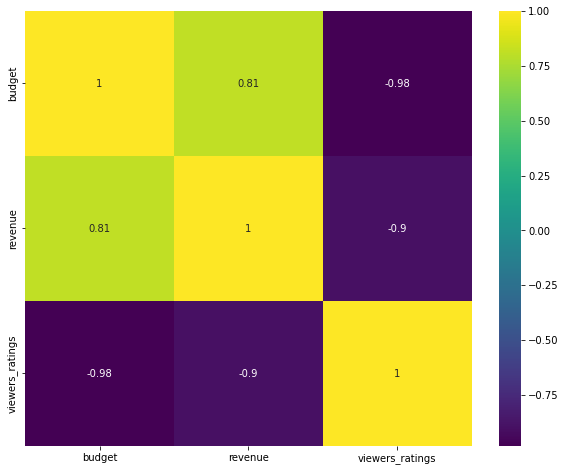

In [85]:
corr_plot_0 = df_0.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr_plot_0, 
            xticklabels=corr_plot_0.columns.values,
            yticklabels=corr_plot_0.columns.values,
           cmap='viridis', annot=True)
plt.show()

***Figure 1 - The correlation plot shows the relationship between the three selected columns (budget, revenue and viwers_ratings)***

##### using a rel plot to check their relationship (budget & ratings)

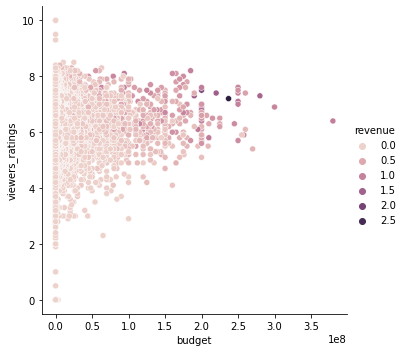

In [86]:
sns.relplot(x="budget", y="viewers_ratings", hue='revenue', data=df) 

***Figure 2 - The plot shows the relative plot between budget and viewers_ratings with the revenue column as hue***

##### using a rel plot to check their relationship (revenue & ratings)

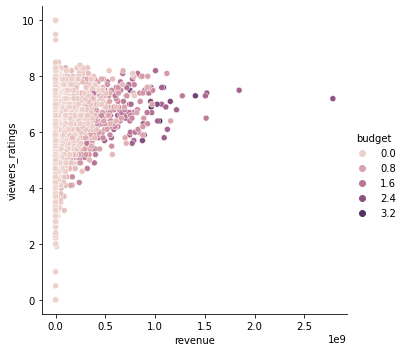

In [87]:
sns.relplot(x="revenue", y="viewers_ratings", hue="budget", data=df)

***Figure 3 - relative plot between revenue and viewers_ratings with the budget column as hue***

##### Use the aggregate method to make sense against the three features 

In [88]:
df_0.agg({'budget' : ['min', 'max', 'sum'], 'revenue' : ['min', 'max', 'sum']})

,budget,revenue
min,0.093137,0.197328
max,1.000000,1.000000
sum,1.823691,1.927881


***Table 2 - The table shows the relative plot between budget and viewers_ratings with the revenue column***

##### repeat the aggregate method with non-zero values to make sense against the three features 

In [89]:
question_0.agg({'budget' : ['min', 'max', 'sum'], 'revenue' : ['min', 'max', 'sum'], 'viewers_ratings' : ['min', 'max', 'sum'] })

,budget,revenue,viewers_ratings
min,1.000000e+00,5.000000e+00,0.5
max,3.800000e+08,2.787965e+09,10.0
sum,1.395699e+11,3.954840e+11,29261.5


***Table 3 - The table shows the relative plot between budget and viewers_ratings with the revenue column with clean figures only***

##### calculate the pearson correlation coefficient and P-value of `budget` and `viewer_ratings`. 

In [90]:
pearson_coef, p_value = stats.pearsonr(df_0['budget'], df_0['viewers_ratings']) 
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of ", p_value)

The Pearson Correlation Coefficient is -0.9823222677582446  with a P-value of  0.11988097285168882


##### calculate the pearson correlation coefficient and P-value of `revenue` and `viewer_ratings`. 

In [91]:
pearson_coef, p_value = stats.pearsonr(df_0['revenue'], df_0['viewers_ratings'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of ", p_value)

The Pearson Correlation Coefficient is -0.9042108042015928  with a P-value of  0.2809199942032555


##### check correlation between the two columns first

##### calculate the pearson correlation coefficient and P-value of `revenue` and `ratings`. 

In [92]:
pearson_coef, p_value = stats.pearsonr(df_0['revenue'], df_0['viewers_ratings'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of ", p_value)

The Pearson Correlation Coefficient is -0.9042108042015928  with a P-value of  0.2809199942032555


##### plot the correlation between the two columns

##### check the missing value in each of the columns

### Q2 - Does the runtime of the movie affect vote_average (viewers_rating)

In [93]:
# columns= runtime, viewers_rating
df_1 = df[['runtime', 'viewers_ratings']].corr()
df_1 

,runtime,viewers_ratings
runtime,1.000000,0.374994
viewers_ratings,0.374994,1.000000


***Table 4 - The table shows correlation between runtime and viewers_ratings columns***

##### find missing two values of the runtime or viwers_ratings columns

In [94]:
print(df['runtime'].isnull().value_counts())

print('....')

print(df['viewers_ratings'].isnull().value_counts())

False    4801
True        2
Name: runtime, dtype: int64
....
False    4803
Name: viewers_ratings, dtype: int64


##### fill the missing two values of the runtime columns with median of their column values

In [95]:
avg_runtime = df['runtime'].astype('float').median(axis=0)
df['runtime'].replace(np.nan, avg_runtime, inplace=True)
df['runtime'].isnull().value_counts()

False    4803
Name: runtime, dtype: int64

##### visualise the correlation plot between runtime and 

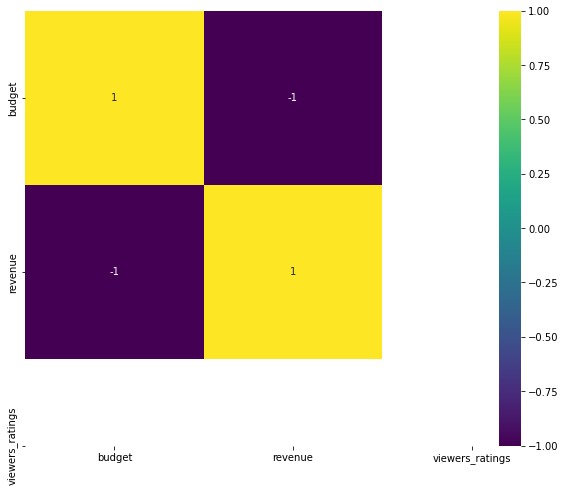

In [96]:
corr_plot_1 = df_1.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr_plot_1, 
            xticklabels=corr_plot_0.columns.values,
            yticklabels=corr_plot_0.columns.values,
           cmap='viridis', annot=True)
plt.show()

***Figure 4 - Correlation plot between revenue and viewers_ratings columns***

##### plot the relplot between the runtime and viwers_ratings with the legend as revenue

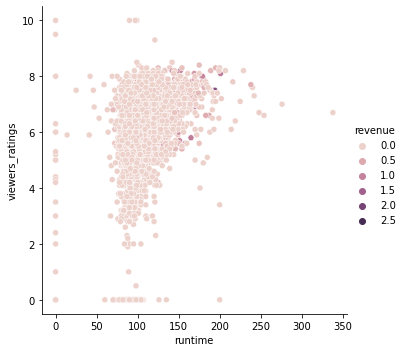

In [97]:
sns.relplot(x="runtime", y="viewers_ratings", hue="revenue", data=df)

***Figure 5 - relative plot between runtime and viewers_ratings with the budget revenue column as hue***

##### subset the zero values in the selected columns

In [99]:
question_1 = df[df[['runtime', 'viewers_ratings']] >0]

##### apply the above to get the min,max, mean values of the columns

In [100]:
question_1.agg({'runtime' : ['min', 'max', 'mean'], 'viewers_ratings' : ['min', 'max', 'mean']})

,runtime,viewers_ratings
min,14.000000,0.500000
max,338.000000,10.000000
mean,107.662542,6.173312


***Table 6 - table showing the min, max, mean value of revenue and viewers_ratings column***

##### calculate the pearson correlation coefficient and P-value of `runtime` and `viewer_ratings`. 

In [102]:
pearson_coef, p_value = stats.pearsonr(df_1['runtime'], df_1['viewers_ratings'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of ", p_value)

The Pearson Correlation Coefficient is -1.0  with a P-value of  1.0


### Q2 - Average Revenue of Movie

##### select the columns - title, revenue

In [127]:
df_2 = df[['title', 'revenue']]
df_2.head() 

,title,revenue
0,Avatar,2787965087
1,Pirates of the Caribbean: At World's End,961000000
2,Spectre,880674609
3,The Dark Knight Rises,1084939099
4,John Carter,284139100


##### remove the zeros values of the revenue

In [131]:
question_2 = df_2[df_2['revenue'] > 0]

##### what are the average revenue of the 5000 movies

In [132]:
question_2.shape

(3377, 2)

In [135]:
# get the mean of the concern columns
def revenue_average():
    x = sum(question_2['revenue'])/len(question_2['revenue'])
    
    return '${:,.2f}MM'.format(x)

print(revenue_average())

$117,111,055.35MM


##### visualise the revenue of movies

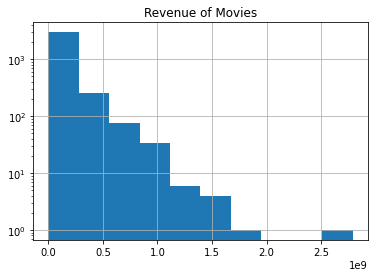

In [136]:
question_2['revenue'].hist()
plt.title('Revenue of Movies')
plt.yscale('log')
plt.show()

***Figure 6 -histogram plot of revenue of movies***

In [137]:
pd.DataFrame(question_2['revenue'].describe())

,revenue
count,3.377000e+03
mean,1.171111e+08
std,1.835275e+08
min,5.000000e+00
25%,1.536890e+07
50%,5.180119e+07
75%,1.401750e+08
max,2.787965e+09


***Table 5 - Summary Stats of Revenue excluding non-zeros***

### Q3  - Top ten revenue generating movie

##### select the columns involved

In [138]:
question_3 = df[['title', 'revenue']]
question_3.head()

,title,revenue
0,Avatar,2787965087
1,Pirates of the Caribbean: At World's End,961000000
2,Spectre,880674609
3,The Dark Knight Rises,1084939099
4,John Carter,284139100


##### remove zero values of revenue

In [139]:
question_3 = question_3[question_3['revenue'] > 0]
question_3.shape

(3377, 2)

##### display the largest reveneue generating movies

In [140]:
top_ten_rev = question_3.nlargest(10, 'revenue')
top_ten_rev

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


***Table 6- Top Ten Movie with Highest Revenue***

##### let us visulaise revenue of movies in a histogram

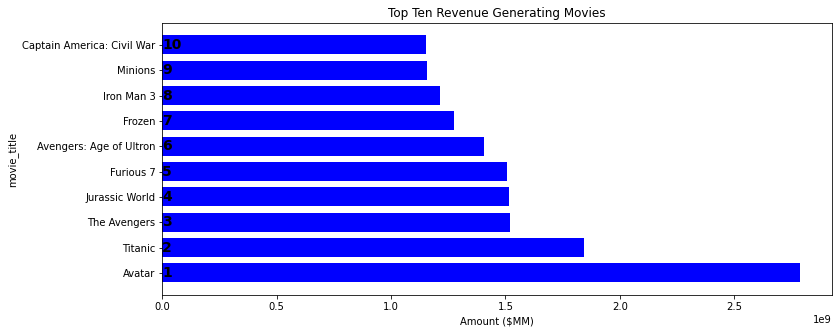

In [141]:
y = top_ten_rev['title'].value_counts(ascending=True)
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(y.index, top_ten_rev['revenue'], height=0.75, color="blue")
plt.title('Top Ten Revenue Generating Movies')
plt.xlabel('Amount ($MM)')
plt.ylabel('movie_title')
_, xmax = plt.xlim()
plt.xlim(0, ) 
for i, v in enumerate(y):
    ax.text(v + 100, i, str(i+1), color='black', fontweight='bold', fontsize=14, ha='left', va='center')
plt.show()

***Figure 7 - Top ten revenue generating movie*** 

### Q4 - Least ten revenue expensive movie

##### select the columns

In [144]:
df_4 = df[['title', 'revenue']]
df_4.head() 

,title,revenue
0,Avatar,2787965087
1,Pirates of the Caribbean: At World's End,961000000
2,Spectre,880674609
3,The Dark Knight Rises,1084939099
4,John Carter,284139100


##### remove revenues with 0 values

In [145]:
question_4 = df_4[df_4['revenue'] > 0]
question_4.shape

(3377, 2)

##### select the smallest ten movies

In [146]:
least_ten_rev = question_4.nsmallest(10, 'revenue')
least_ten_rev

,title,revenue
3377,Split Second,5
3424,Bran Nue Dae,7
3882,Dreaming of Joseph Lees,7
3433,Bats,10
2938,F.I.S.T.,11
3136,Of Horses and Men,11
1661,Chasing Liberty,12
2491,The Cookout,12
1918,Angela's Ashes,13
1777,The 51st State,14


***Table 7 - Least ten revenue of movies***

##### list the names of the movies and display them in a horizontal bar plot

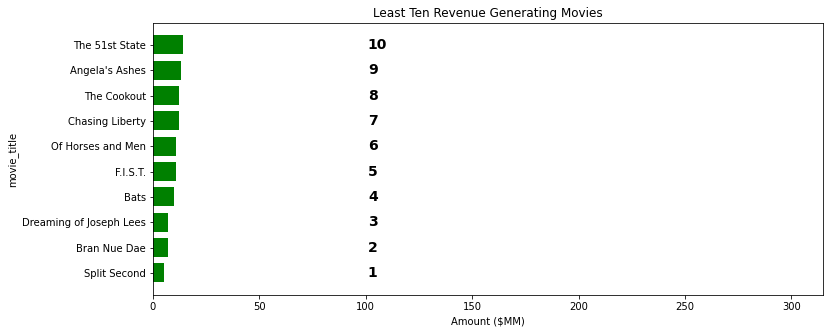

In [147]:
z = least_ten_rev['title'].value_counts(ascending=False)
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(z.index, least_ten_rev['revenue'], height=0.75, color="green")
plt.title('Least Ten Revenue Generating Movies')
plt.xlabel('Amount ($MM)')
plt.ylabel('movie_title')
_, xmax = plt.xlim()
plt.xlim(0, xmax+300)
for i, v in enumerate(z):
    ax.text(v + 100, i, str(i+1), color='black', fontweight='bold', fontsize=14, ha='left', va='center')
plt.show()

***Figure 8 - Least ten revenue generating movie*** 

### Q5  - Movies with highest number of viewers_votes

##### examine the veiwers count by selecting all the needed columns

In [148]:
df.get(["viewers_ratings", 'title']).max()

viewers_ratings        10.0
title              Æon Flux
dtype: object

<a id='conclusions'></a>
## Conclusions

***Notes about Pearson Correlation***
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

***Notes about P-value:***
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

### Conclusion 0   -Does  budget and revenue of movie affect its vote_average (viewers_rating)

- ***There is negative strong correlation between budget vs viewers_ratings***
- ***There is a negative strong correlation between revenue vs viewers_ratings***

***For statistical relationship between budget and viewers_ratings are as follows*** 
- ***Pearson Correlation Coefficient is -0.982349218921438 - negative correlation***
- ***P-value of 0.1197892829770205 - no strong evidence that the correlation is significant***  

***For statistical relationship between revenue and viewers_ratings are as follows*** 
- ***The Pearson Correlation Coefficient is -0.9041933402853557  -  negative correlation***
- ***with a P-value of 0.28094602498368976 - strong evidence that the correlation is significant***  with a P-value of  

### Conclusion 1  - Does the runtime of the movie affect vote_average (viewers_rating)

- ***The is generally a weak correlation between runtime and viewers_ratings***

***For statistical relationship between runtime and viewers_ratings are as follows*** 
- ***The Pearson Correlation Coefficient is  -1.0 - weak linear correlation***
- ***P-value of  1.5549345443982652e-159 - no evidence that the correlation is significant***

### Conclusion 2  - What are the average revenue of the 5000 movies

***The revenue generated from over 4900 movies is $117,275,055MM***

### Conclusion 3 - Top ten revenue generating movie

***The top generating movie are as follow with their amount***

|s/n|title_names|revenue($)|
|--|------------|-------|
|1.|Avatar|2787965087|
|2.|Titanic|1845034188|
|3.|The Avengers|1519557910|
|4.|Jurassic World|1513528810|
|5.|Furious 7|1506249360|
|6.|Avengers: Age of Ultron|1405403694|
|7.|Frozen|1274219009|
|8.|Iron Man 3|1215439994|
|9.|Minions|1156730962|
|10.|'Captain America: Civil War|1153304495|	

### Conclusion 4 - Least ten revenue expensive movie

***The least ten generating movie are as follow with their amount***

|s/n|title_names|revenue ($)|
|--|------------|-------|
|1|Split Second|5000 000|
|2|Bran Nue Dae|7, 000, 000|
|3.|Dreaming of Joseph Lees|7, 000, 000|
|4.|Bats|10,000,000|
|5.|F.I.S.T|11,000,000|
|6.|Of Horses and Men|11,000,000|
|7.|Chasing Liberty|12,000,000|
|8.|The Cookout|12,000,000|
|9.|Angela's Ashes|13,000,000|
|10.|The 51st State|14,000,000|

### Conclusion 5 - Movies with highest number of viewers_votes

- ***the movie with the highest ratings from viewers is titled `Æon Flux`***

<a id='limiations'></a>
## Limitation

- ***The dataset had the issue of time stamp of release and an actual method with which the ratings of each movie was gotten***

<hr>
<p>Copyright &copy;2022-06-05.
   This notebook and its source code are produced by (Chisom OKoye)<a href="https://chisomloius.github.io/"> ALX-T DATA ANALYST COURSE</a>.</p>